In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [109]:
########### 2a Personen mit >70 Bildern #############
import os, tarfile
from urllib.request import urlretrieve
if not os.path.isfile('lfw-funneled.tgz'):
    print("Downloading")
    urlretrieve('http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz',filename = 'lfw-funneled.tgz')
    
# Pfad zur heruntergeladenen tgz-Datei
tgz_file = 'lfw-funneled.tgz'

# Zielverzeichnis für die Extraktion
extracted_directory = 'lfw_funneled'

# Extrahiere den Datensatz aus der tgz-Datei
if not os.path.exists(extracted_directory):
    with tarfile.open(tgz_file, 'r:gz') as tar:
        print("Extracting...")
        tar.extractall(os.getcwd())
else: 
    print("Verzeichnis gefunden.")

Verzeichnis gefunden.


In [149]:
# Funktion zum Durchsuchen des Verzeichnisses und Ermitteln der Personen mit mindestens 70 Bildern
def find_persons_with_min_images(dataset_directory, min_images=70):
    persons = {}
    
    for root, dirs, files in os.walk(dataset_directory):
        if len(files) >= min_images:
            person_name = os.path.basename(root)
            persons[person_name] = len(files)

    return {k: v for k, v in persons.items() if v >= min_images}

In [150]:
persons = find_persons_with_min_images(extracted_directory, min_images=70)

# Ausgabe der gefundenen Personen
for person, num_images in persons.items():
    print(f'{person}: {num_images} Bilder')

Ariel_Sharon: 77 Bilder
Colin_Powell: 236 Bilder
Donald_Rumsfeld: 121 Bilder
George_W_Bush: 530 Bilder
Gerhard_Schroeder: 109 Bilder
Hugo_Chavez: 71 Bilder
Tony_Blair: 144 Bilder


In [151]:
########### 2b #############
from skimage import io, transform
lfw_path = os.path.join(os.getcwd(), extracted_directory)
    
train_images = {
    "label" : [],
    "data" : []
}
test_images = {
    "label" : [],
    "data" : []
}

for person in persons.keys():
    person_folder = os.path.join(lfw_path, person)
    
    for i, img_name in enumerate(os.listdir(person_folder)):
        img_path = os.path.join(person_folder, img_name)
        img = io.imread(img_path, as_gray=True)
        img = transform.resize(img, (32, 32))
        img = img.flatten()
        
        if i == 0:
            test_images['label'].append(person)
            test_images['data'].append(img)
        else:
            train_images['label'].append(person)
            train_images['data'].append(img)

print("Anzahl Trainingsbilder: ", len(train_images['data']))

Anzahl Trainingsbilder:  1281


In [152]:
 ########### 2c PCA #############
df_train_labels = pd.DataFrame(train_images["label"])
df_train_data = pd.DataFrame(train_images["data"])
df_test_labels = pd.DataFrame(test_images["label"])
df_test_data = pd.DataFrame(test_images["data"])

design_matrix = df_train_data
print("Shape Design Matrix: ", design_matrix.shape)
design_matrix.head()



Shape Design Matrix:  (1281, 1024)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1.731834e-03,1.358790e-03,8.419919e-04,8.571033e-04,1.098291e-03,6.259112e-04,6.383215e-04,6.254930e-04,0.000519,0.000176,...,0.176036,0.172264,0.169924,0.146757,0.115506,0.137927,0.151165,0.147454,0.139519,0.118177
1,4.155759e-08,7.900364e-08,3.571582e-08,6.326618e-08,3.320679e-07,1.138184e-07,2.999821e-07,4.399655e-07,0.000002,0.000032,...,0.157153,0.136794,0.193261,0.171958,0.106515,0.054744,0.023119,0.007346,0.000907,0.000246
2,1.454622e-05,1.353811e-05,1.213530e-05,1.000660e-05,9.705662e-06,9.087177e-06,7.818781e-06,4.923597e-06,0.000002,0.000002,...,0.268272,0.261375,0.249656,0.248895,0.246770,0.238726,0.232243,0.239064,0.207320,0.029076
3,5.650977e-03,6.404247e-03,7.861569e-03,8.486010e-03,8.225671e-03,8.038577e-03,7.934048e-03,8.059189e-03,0.008515,0.008155,...,0.859848,0.353423,0.238177,0.229086,0.225277,0.221755,0.218256,0.212289,0.195195,0.182847
4,4.532152e-03,7.206601e-03,1.095375e-02,1.560979e-02,2.376669e-02,3.378400e-02,4.602419e-02,6.003674e-02,0.075438,0.087818,...,0.877776,0.795434,0.425241,0.077339,0.054429,0.060523,0.058288,0.050988,0.048720,0.045532


In [153]:
print("Shape test Matrix: ", df_test_data.shape)
df_test_data.head()

Shape test Matrix:  (7, 1024)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.031791,0.068142,0.139200,0.255316,0.368133,0.471134,0.543556,0.532451,0.525311,0.609675,...,0.315537,0.601817,0.916662,0.915353,0.751936,0.264235,0.083019,0.050187,0.030502,0.016062
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050700,0.047139,0.038114,0.039891,0.042419,0.018554,0.020728,0.025612,0.025944,0.017400
2,0.229241,0.795853,0.839558,0.827063,0.774386,0.745429,0.727844,0.715120,0.708681,0.696417,...,0.054567,0.057414,0.061907,0.067487,0.078764,0.078636,0.080659,0.085416,0.092163,0.097851
3,0.127247,0.132904,0.137883,0.131864,0.130466,0.143895,0.137758,0.134008,0.136990,0.146408,...,0.732187,0.645383,0.505409,0.188619,0.184926,0.183529,0.134629,0.104200,0.075808,0.060903
4,0.717750,0.726223,0.742523,0.765786,0.784654,0.801827,0.799386,0.775551,0.726989,0.713252,...,0.180168,0.173408,0.143869,0.097845,0.088831,0.109491,0.121103,0.104415,0.099571,0.031709


In [155]:
import math

# Center and normalize variance
for entry in design_matrix:
    variance = design_matrix[entry].var()
    design_matrix[entry] -= design_matrix[entry].mean()
    design_matrix[entry] /= math.sqrt(variance)
    
# SVD
U, D, Vt = np.linalg.svd(design_matrix)
eigenvectors = Vt
eigenvalues = (D ** 2) / (len(design_matrix) - 1)

explained_variance_ratio = eigenvalues / np.sum(eigenvalues) # Gesamtvarianz = Summe über alle Eigenwerte
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # Kommunlative Varianz
# Tabelle erstellen
results = pd.DataFrame({
    'Eigenvalues': eigenvalues,
    'Erklärte Varianz': explained_variance_ratio,
    'Kumulative erklärte Varianz': cumulative_explained_variance
})
# Ausgabe der Ergebnisse
results

,Eigenvalues,Erklärte Varianz,Kumulative erklärte Varianz
0,243.261883,2.375604e-01,0.237560
1,72.094373,7.040466e-02,0.307965
2,58.700903,5.732510e-02,0.365290
3,56.964079,5.562898e-02,0.420919
4,48.702528,4.756106e-02,0.468480
...,...,...,...
1019,0.000035,3.456617e-08,1.000000
1020,0.000035,3.423743e-08,1.000000
1021,0.000032,3.098518e-08,1.000000
1022,0.000028,2.771048e-08,1.000000


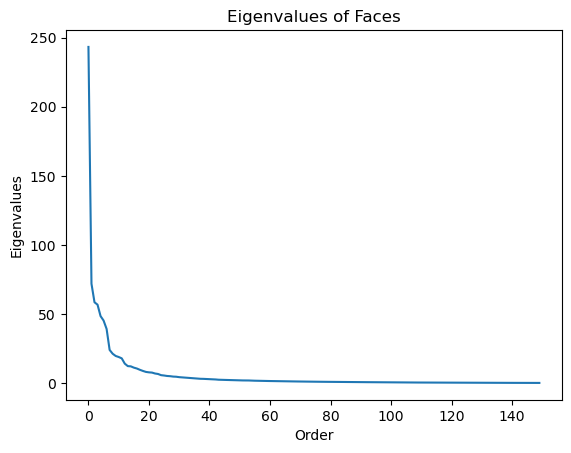

In [156]:
plt.plot(eigenvalues[:150])
plt.title("Eigenvalues of Faces")
plt.xlabel("Order")
plt.ylabel("Eigenvalues")
plt.show()

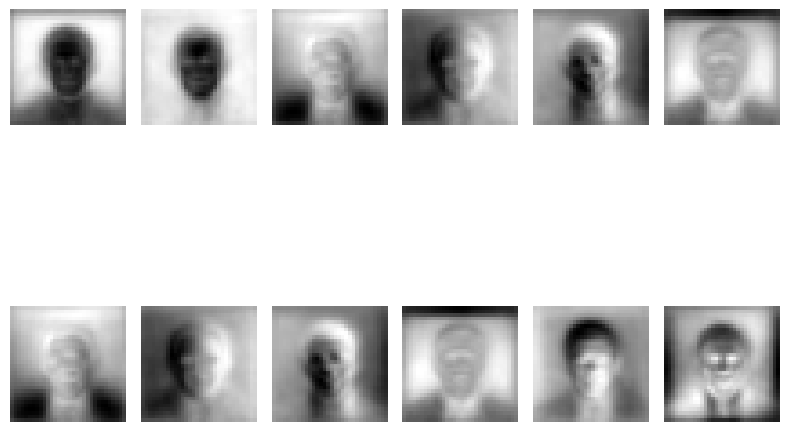

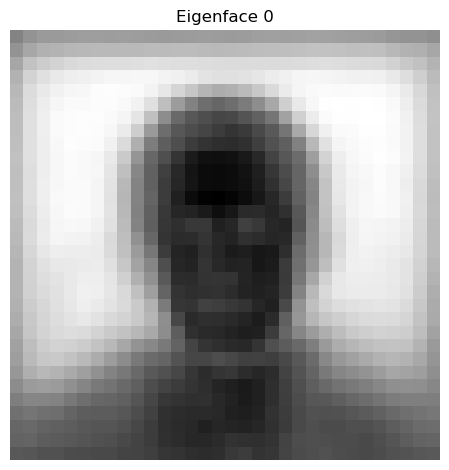

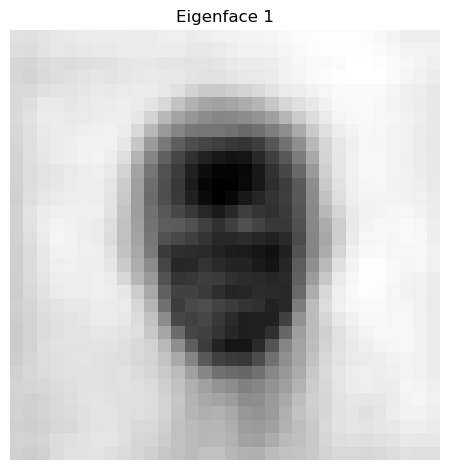

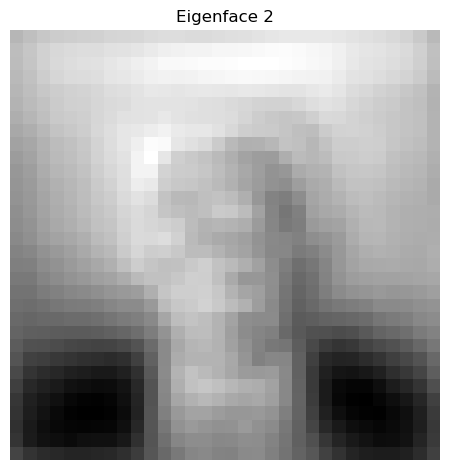

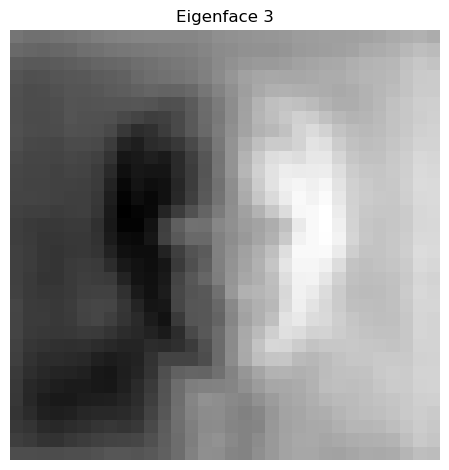

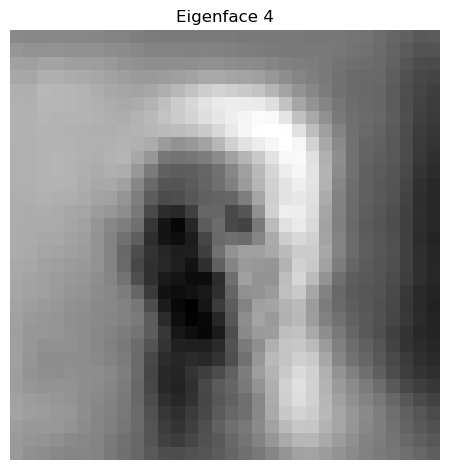

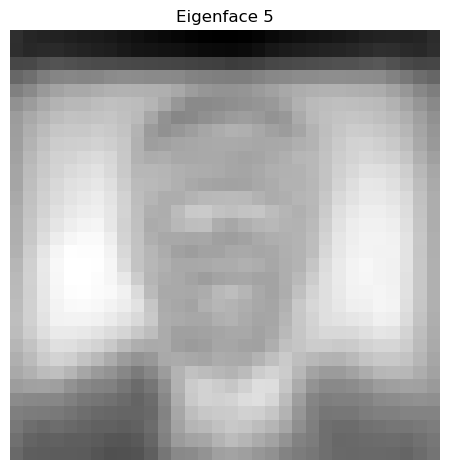

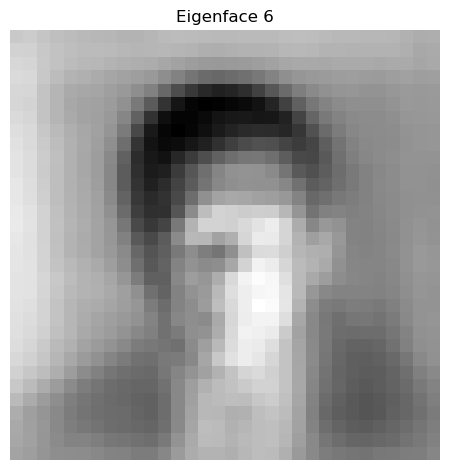

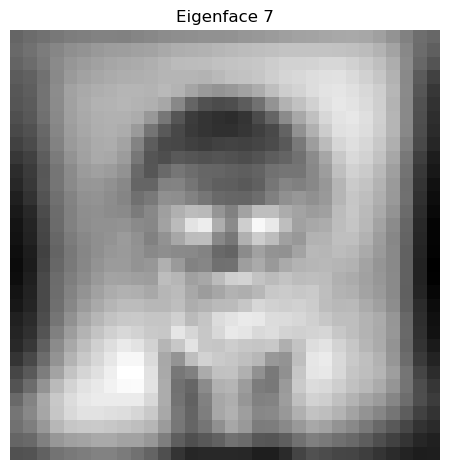

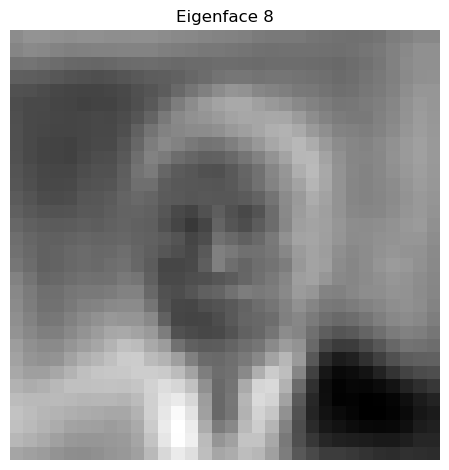

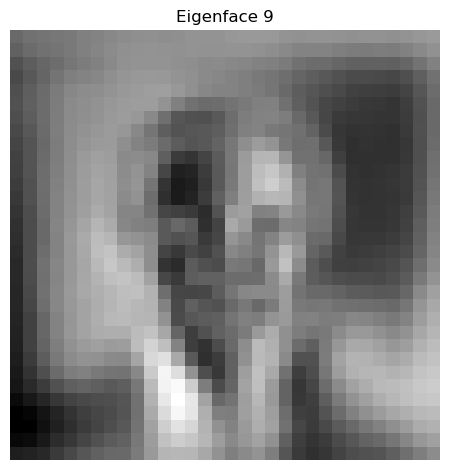

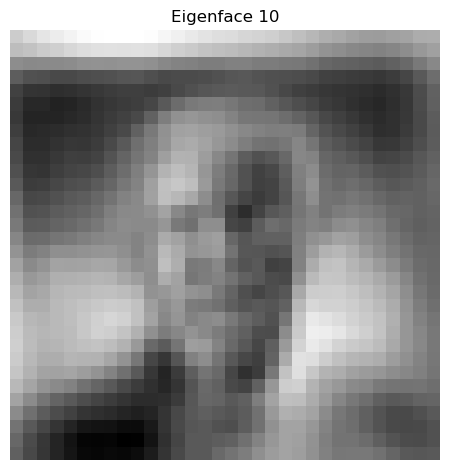

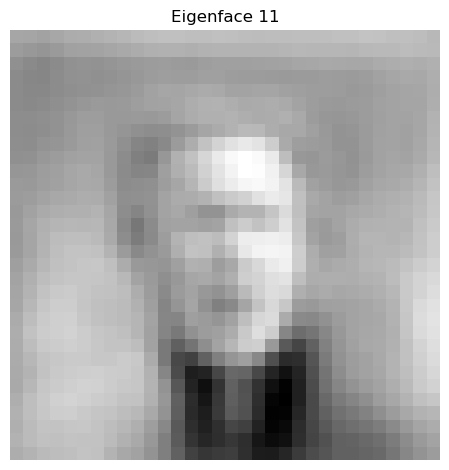

In [157]:
# Show the first 12 eigenfaces
eigenfaces = eigenvectors[:12]
fig, axs = plt.subplots(2, 6, figsize=(8, 8))
for i in range(2):
    for j in range(6):
        bild = eigenfaces[i * 2 + j].reshape(32, 32)
        axs[i, j].imshow(bild, cmap='gray')  # Hier wird angenommen, dass die Bilder Graustufenbilder sind
        axs[i, j].axis('off')  # Die Achsenbeschriftungen ausschalten

plt.tight_layout()  # Verbessert die Layoutanordnung
plt.show()


for index, eigenface in enumerate(eigenfaces):
    image = eigenface.reshape((32, 32))

    plt.imshow(image, cmap='gray')  # 'gray' colormap for grayscale images
    plt.title(f"Eigenface {index}")
    plt.axis('off')  # Turn off axis labels
    plt.tight_layout()
    plt.show()

In [161]:
# Transform the data to the first 7 eigenfaces
scores = np.dot(design_matrix, eigenvectors[:7].T)
test_scores = np.dot(df_test_data, eigenvectors[:7].T)

In [162]:
scores = pd.DataFrame(scores)
test_scores = pd.DataFrame(test_scores)

for i, test_img in test_scores.iterrows():
    min_dist = float('inf')
    match_train_idx = 0
    
    for j, train_img in scores.iterrows():    
        d = np.linalg.norm(train_img - test_img)
    
        if d < min_dist:
            min_dist = d
            match_train_idx = j
    
    print(f"Matched: {df_test_labels[0][i]} -> {df_train_labels[0][match_train_idx]}")

Matched: Ariel_Sharon -> George_W_Bush
Matched: Colin_Powell -> George_W_Bush
Matched: Donald_Rumsfeld -> George_W_Bush
Matched: George_W_Bush -> Gerhard_Schroeder
Matched: Gerhard_Schroeder -> George_W_Bush
Matched: Hugo_Chavez -> George_W_Bush
Matched: Tony_Blair -> Gerhard_Schroeder
